# Question 2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sn
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
import joblib
# import matplotlib.colors as cma

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

In [ ]:
data = loadmat('/content/drive/My Drive/ML_Assignment2/dataset_1.mat')

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'samples', 'labels'])

In [ ]:
df = pd.DataFrame(data['samples'],columns=['x','y'])
df['label'] = data['labels'][0]

In [ ]:
df = df.sample(frac = 1)

In [ ]:
# joblib.dump(df,'/content/drive/My Drive/ML_Assignment2/Question2_data')

In [ ]:
df = joblib.load('/content/drive/My Drive/ML_Assignment2/Question2_data')

In [ ]:
samples = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values

In [ ]:
labels

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
samples.shape

(5000, 2)

In [ ]:
labels.shape

(5000,)

# Question 2.a)

In [ ]:
def plotting(samples,labels,i):
  ds = pd.DataFrame(samples,columns=['x'+str(i),'y'+str(i)])
  ds['label'+str(i)] = labels
  plt.figure(figsize=(5,5))
  # plt.title(lbl)
  sn.scatterplot(data=ds, x='x'+str(i), y='y'+str(i), hue='label'+str(i),
                legend=True)

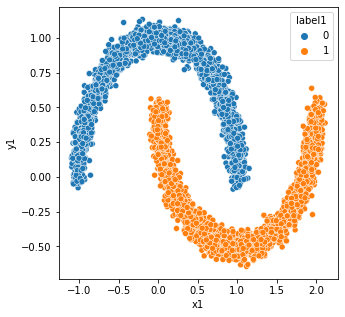

In [ ]:
plotting(samples,labels,1)

# Question 2, 3 (LogRegression Class)

In [ ]:
class LogRegression(object):
    """docstring for LogRegression."""
    def __init__(self, X=0, y=0):
        super(LogRegression, self).__init__()
        self.X = X
        self.y = y

    def splitting(self,X,y,test_size):
      size = y.size
      train_size = int (size*(1-test_size))
      X_train = X[:train_size,:]
      X_test = X[train_size:,:]
      y_train = y[:train_size]
      y_test = y[train_size:]

      return X_train, X_test, y_train, y_test

    def k_fold(self,X, y, k, testSet_no):
      size = y.size
      test_size = int (size*(1/k))
      
      testSet_no -= 1
      test_start = testSet_no*test_size
      test_finish = (testSet_no+1)*test_size
      
      X_test = X[test_start:test_finish,:]
      for i in range(0,test_size):
        X = np.delete(X,test_start,0)
      
      y_test = y[test_start:test_finish]
      for i in range(0,test_size):
        y = np.delete(y,test_start,0)
      
      return X,X_test,y,y_test

    def checking_accuracy(self,y_test,y_pred):
      n=0
      j=0
      while (j<y_test.size): #test_accuracy
        if (y_pred[j] == y_test[j]):
          n+=1
        j+=1
      accu = n/j
      return accu

    def checking_accuracy_classwise(self,y_test,y_pred,class_):
      n=0
      j=0
      i=0
      while (j<y_test.size): #test_accuracy
        if (y_pred[j] == y_test[j] and y_pred[j] == class_):
          n += 1
          i += 1
        elif (y_test[j] == class_):
          i += 1
        j+=1
      accu = n/i
      return accu

    def fit_stochastic(self, X_train, y_train):
      X_train = np.c_[X_train, np.ones(X_train.shape[0])]
      self.theta = np.zeros(X_train.shape[1])
      ex = 2.718
      for i in range(0,X_train.shape[0]):
        power = np.dot(self.theta,X_train[i])
        self.theta += (0.1 *((y_train[i]-(1/(1+(ex**(-power))))) * X_train[i]))
      
      return self.theta

    """You can give any required inputs to the fit()"""
    def fit(self, X_train, y_train):
      X_train = np.c_[X_train, np.ones(X_train.shape[0])]
      self.theta = np.zeros(X_train.shape[1])
      it_theta = np.zeros((10,self.theta.size))
      ex = 2.718
      for j in range(0,100):
        power = np.dot(X_train, self.theta)
        mlt = (y_train-(1/(1+(ex**(-power)))))
        mlt = mlt.reshape(1,mlt.size)
        mlt = (0.001 * np.dot(mlt,X_train))
        mlt = mlt.reshape(mlt.size)
        self.theta += mlt
        if(j%10 == 0):
          it_theta[int(j/10)] = self.theta
      return it_theta
      """Write it from scratch. Usage of sklearn is not allowed"""

    def fit_l2(self, X_train, y_train, lmbd):
      X_train = np.c_[X_train, np.ones(X_train.shape[0])]
      self.theta = np.zeros(X_train.shape[1])
      it_theta = np.zeros((10,self.theta.size))
      ex = 2.718
      for j in range(0,100):
        power = np.dot(X_train, self.theta)
        mlt = (y_train-(1/(1+(ex**(-power)))))
        mlt = mlt.reshape(1,mlt.size)
        mlt = (0.001 * np.dot(mlt,X_train))
        mlt = mlt.reshape(mlt.size)
        
        self.theta += mlt
        l2 = np.sum(self.theta) # self.theta)
        self.theta = (self.theta + (l2 * lmbd))
        if(j%10 == 0):
          it_theta[int(j/10)] = self.theta
      return it_theta

    def fit_l2_stochastic(self, X_train, y_train, lmbd):
      X_train = np.c_[X_train, np.ones(X_train.shape[0])]
      self.theta = np.zeros(X_train.shape[1])
      ex = 2.718
      for i in range(0,X_train.shape[0]):
        power = np.dot(self.theta,X_train[i])
        self.theta += (0.1*((y_train[i]-(1/(1+(ex**(-power))))) * X_train[i]))
        
      l2 = np.dot(self.theta, self.theta)
      
      self.theta = (self.theta + (l2 * lmbd)) #/(2*y_train.size)
      return self.theta


    """ You can add as many methods according to your requirements, but training must be using fit(), and testing must be with predict()"""


    def predict(self, X_test):

      """Write it from scratch. Usage of sklearn is not allowed"""
      y_pred = []
      for i in range(0,X_test.shape[0]):
        y = self.theta[self.theta.size-1]
        for j in range(0,X_test.shape[1]):
          y += self.theta[j] * X_test[i][j]
        if (y > 0):
          y_pred.append(1)
        else:
          y_pred.append(0)
      y_pred = np.array(y_pred)
      
      """Fill your code here. predict() should only take X_test and return predictions."""
      return y_pred

    def predict_theta(self, X_test, theta):
      y_pred = []
      for i in range(0,X_test.shape[0]):
        y = theta[theta.size-1]
        for j in range(0,X_test.shape[1]):
          y += theta[j] * X_test[i][j]
        if (y > 0):
          y_pred.append(1)
        else:
          y_pred.append(0)
      y_pred = np.array(y_pred)
      return y_pred

    def loss1(self, y, x, theta):
      m = x.shape[0]
      x = np.c_[x, np.ones(x.shape[0])]
      ex = 2.718
      power = np.dot(x,theta)
      z = (1/(1+(ex**(-power))))
      left= y * np.log(z) 
      right=  (1-y)* np.log (1-z)
      total_cost = -(1/m) * np.sum( left + right)
      return total_cost
    
    def loss1_l2(self, y, x, theta,lmbd):
      m = x.shape[0]
      x = np.c_[x, np.ones(x.shape[0])]
      l2 = ((lmbd * np.dot(theta, theta))/(2*y.size))
      ex = 2.718
      power = np.dot(x,theta)
      z = (1/(1+(ex**(-power))))
      left= y * np.log(z) 
      right=  (1-y)* np.log (1-z)
      total_cost = -(1/m) * np.sum( left + right)
      total_cost += l2 
      return total_cost

    def plots(self, X, y, cl, title):
      cMap = cma.ListedColormap(["blue", cl])
      cMapa = cma.ListedColormap([cl, "blue"])
      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      h = .02  # step size in the mesh
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      Z = self.predict(np.column_stack((xx.ravel(), yy.ravel())))
      Z = Z.reshape(xx.shape)
      plt.figure(1, figsize=(8, 6), frameon=True)
      # plt.axis('off')
      plt.title(title)
      plt.pcolormesh(xx, yy, Z, cmap=cMap)
      plt.scatter(X[:, 0], X[:, 1], c=y, marker = "o", edgecolors='k', cmap=cMapa)
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.show()

    def plotting__(self,itr,train_ac,test_ac,title,ylbl):
      train_ac = np.array(train_ac)
      test_ac = np.array(test_ac)
      itr = np.array(itr)
      plt.figure(figsize=[6,6])
      plt.xlabel('Iterations',fontsize=15)
      plt.ylabel(ylbl,fontsize=15)
      plt.plot(itr,train_ac,label='train accuracy',marker='o')
      plt.plot(itr,test_ac,label='test accuracy',marker='v')
      plt.title(title)
      plt.legend()
      plt.show()

    def fit_on_folds_c(self, k):
      train_acc_out = []
      test_acc_out = []
      test_loss_out = []
      train_loss_out = []
      itr = [i for i in range(0,100) if(i%10 == 0)]
      
      for i in range(1,k+1):
        
        X_train,X_test,y_train,y_test = self.k_fold(self.X,self.y,k,i)
        
        thetas = self.fit(X_train,y_train)
        
        train_acc = []
        test_acc = []
        test_loss = []
        train_loss = []
        for theta in thetas:
          y_pred1 = self.predict_theta(X_test,theta)
          test_acc.append(self.checking_accuracy(y_test, y_pred1))
          test_loss.append(self.loss1(y_test,X_test,theta))
          y_pred2 = self.predict_theta(X_train,theta)
          train_acc.append(self.checking_accuracy(y_train, y_pred2))
          train_loss.append(self.loss1(y_train,X_train,theta))

        self.plotting__(itr,train_acc,test_acc,"Accuracies Plot for {0:d}th fold".format(i),'Accuracy')
        self.plotting__(itr,train_loss,test_loss,"Loss's Plot for {0:d}th fold".format(i),'Loss')

        test_acc_out.append(test_acc[-1])
        test_loss_out.append(test_loss[-1])
        train_acc_out.append(train_acc[-1])
        train_loss_out.append(train_loss[-1])
      
      return train_acc_out, test_acc_out, train_loss_out, test_loss_out

    def fit_on_folds_d(self, k):
      train_acc = []
      test_acc = []
      test_loss = []
      train_loss = []
      itr = [i for i in range(0,100) if(i%10 == 0)]

      for i in range(1,k+1):
        
        X_train,X_test,y_train,y_test = self.k_fold(self.X,self.y,k,i)
        j=10
        max_ac = 0
        lmbd = 0
        while (j <= 10000):
          lmb = 1/j
          self.fit_l2(X_train,y_train,lmb)
          y_pred1 = self.predict(X_test)
          ac1 = self.checking_accuracy(y_test, y_pred1)
          
          if(ac1 > max_ac):
            max_ac = ac1
            lmbd = lmb
          j*=10
        print('\033[1m'+"Best Lambda:{0:.4f}".format(lmbd))
        thetas = self.fit_l2(X_train,y_train,lmbd)
        train_acc_in = []
        test_acc_in = []
        test_loss_in = []
        train_loss_in = []
        for theta in thetas:
          y_pred1 = self.predict_theta(X_test,theta)
          test_acc_in.append(self.checking_accuracy(y_test, y_pred1))
          test_loss_in.append(self.loss1_l2(y_test,X_test,theta,lmbd))
          y_pred2 = self.predict_theta(X_train,theta)
          train_acc_in.append(self.checking_accuracy(y_train, y_pred2))
          train_loss_in.append(self.loss1_l2(y_train,X_train,theta,lmbd))
        # print(thetas)
        self.plotting__(itr,train_acc_in,test_acc_in,"Accuracies Plot for {0:d}th fold".format(i),'Accuracy')
        self.plotting__(itr,train_loss_in,test_loss_in,"Loss's Plot for {0:d}th fold".format(i),'Loss')

        test_acc.append(test_acc_in[-1])
        test_loss.append(test_loss_in[-1])
        
        train_acc.append(train_acc_in[-1])
        train_loss.append(train_loss_in[-1])

      return train_acc, test_acc, train_loss, test_loss

    def fit_on_folds_e(self, k):
      train_acc = []
      test_acc = []
      test_loss = []
      train_loss = []
      
      for i in range(1,k+1):
        
        X_train,X_test,y_train,y_test = self.k_fold(self.X,self.y,k,i)
        clf = LR()
        clf.fit(X_train,y_train)
        theta = clf.coef_
        theta0 = clf.intercept_
        theta = np.insert(theta,theta.size,theta0)

        y_pred1 = clf.predict(X_test)
        test_acc.append(self.checking_accuracy(y_test,y_pred1))
        test_loss.append(self.loss1(y_test,X_test,theta))

        y_pred2 = clf.predict(X_train)
        train_acc.append(self.checking_accuracy(y_train,y_pred2))
        train_loss.append(self.loss1(y_train,X_train,theta))

      return train_acc, test_acc, train_loss, test_loss

    def ovo_acc(self,fdata,models,classes,X_test1,y_test1,kth):
      y_pred_one = []
      for i in range(1,models+1):
        to_split = fdata.iloc[5000*(i-1):5000*i,:].values
        np.random.shuffle(to_split)
        # joblib.dump(to_split,'/content/drive/My Drive/ML_Assignment2/Question3b_data'+str(kth)+'fold'+str(i))
        to_split = joblib.load('/content/drive/My Drive/ML_Assignment2/Question3b_data'+str(kth)+'fold'+str(i))
        sample = to_split[:,:-1]
        label = to_split[:,-1]
        
        X_train, X_test, y_train, y_test = self.splitting(sample,label,0.2)
        
        theta = self.fit_stochastic(X_train,y_train)
        y_pred = self.predict_theta(X_test1, theta)
        y_pred_one.append(y_pred)
        # # plots(X_test,y_pred,"red","{0:d}th".format(i),theta)
        
      y_pred_one = np.array(y_pred_one)
      first = 0
      second = 1
      for i in range(0,models):
        for j in range(y_test1.size):
          if (y_pred_one[i][j] == 0):
            y_pred_one[i][j] = first
          else:
            y_pred_one[i][j] = second
        if (second == classes-1):
          first += 1
          second = first + 1
        else:
          second += 1
      y_pred1 = np.full((y_test1.size),-1)
      for j in range(0,y_test1.size):
        vote = [0]*classes
        for i in range(0,models):
          vote[y_pred_one[i][j]]+=1
        max = 0
        indx = -1
        for m in range(len(vote)):
          if (vote[m] > max):
            max = vote[m]
            indx = m
        y_pred1[j] = indx

      return y_pred1

    def ovo(self,df,k):
      fdata = pd.DataFrame(columns=['x','y','label'])
      samples = df.iloc[:,:-1].values
      labels = df.iloc[:,-1].values
      classes = np.unique(labels).size
      models = int((classes*(classes-1))/2)
      for i in range(0,classes-1):
        for j in range(i+1,classes):
          dt = df.loc[df.index[df['label'] == i],:]
          dt1 = df.loc[df.index[df['label'] == j],:]
          dt['label'] = 0.0
          dt1['label'] = 1.0
          dt = dt.append(dt1)
          fdata = fdata.append(dt)
      
      test_acc = []
      
      train_acc = []
      
      for d in range(1,k+1):
        X_train1, X_test1, y_train1, y_test1 = self.k_fold(samples,labels,k,d)
        y_pred1 = self.ovo_acc(fdata,models,classes,X_test1,y_test1,d)
        print('\033[1m'+"Fold {0:d}".format(d))
        for v in range(0,classes):
          print("Testing  Accuracy for class{0:d} is:".format(v),"{0:.2f}".format(self.checking_accuracy_classwise(y_test1,y_pred1,v)))
        test_acc.append(self.checking_accuracy(y_test1,y_pred1))
        print()
        y_pred1 = self.ovo_acc(fdata,models,classes,X_train1,y_train1,d)
        for v in range(0,classes):
          print("Training Accuracy for class{0:d} is:".format(v),"{0:.2f}".format(self.checking_accuracy_classwise(y_train1,y_pred1,v)))
        train_acc.append(self.checking_accuracy(y_train1,y_pred1))
        print("\n")
      return train_acc, test_acc


    def ovr_acc(self,classes,samples,y_rest,X_test1,y_test1,test_or_train):
      y_pred_rest = []

      y_test_ = np.zeros((classes,y_test1.size), dtype=int)
      for i in range(0,classes):
        for j in range(0,y_test1.size):
          if (y_test1[j] == i):
            y_test_[i][j] = 0
          else:
            y_test_[i][j] = 1

      for i in range(0,classes):
        y = y_rest[i]
        X_train, X_test, y_train, y_test = self.splitting(samples,y,0.25)
        theta = self.fit_l2_stochastic(X_train,y_train,0.0001)
        y_pred = self.predict_theta(X_test1,theta)
        y_pred_rest.append(y_pred)
      y_pred_rest = np.array(y_pred_rest)

      acc = 0      
      for i in range(0,classes):
        ac1 = self.checking_accuracy(y_test_[i],y_pred_rest[i])
        print('\033[1m'+test_or_train+" Accuracy for class{0:d} is:".format(i),"{0:.2f}".format(ac1))
        acc += ac1
      
      return (acc/classes)

    def ovr(self,samples,labels,k):
      classes = np.unique(labels).size
      y_rest = np.zeros((classes,labels.size), dtype=int)
      for i in range(0,classes):
        for j in range(0,labels.size):
          if (labels[j] == i):
            y_rest[i][j] = 0
          else:
            y_rest[i][j] = 1
      test_acc = []
      train_acc = []
      for d in range(1,k+1):
        X_train1, X_test1, y_train1, y_test1 = self.k_fold(samples,labels,k,d)
        
        print('\033[1m'+"Fold {0:d}".format(d))
        test_acc.append(self.ovr_acc(classes,samples,y_rest,X_test1,y_test1,'Testing'))
        
        print()
        train_acc.append(self.ovr_acc(classes,samples,y_rest,X_train1,y_train1,'Training'))

        print("\n")
      return train_acc, test_acc
    
    def fit_on_folds_3d(self, k):
      train_acc_ovr = []
      test_acc_ovr = []
      train_acc_ovo = []
      test_acc_ovo = []
      
      for i in range(1,k+1):
        
        X_train,X_test,y_train,y_test = self.k_fold(self.X,self.y,k,i)
        clf = LR(multi_class='ovr')
        clf.fit(X_train,y_train)

        y_pred1 = clf.predict(X_test)
        test_acc_ovr.append(self.checking_accuracy(y_test,y_pred1))
        y_pred2 = clf.predict(X_train)
        train_acc_ovr.append(self.checking_accuracy(y_train,y_pred2))
 
        clf = OneVsOneClassifier(LR())
        clf.fit(X_train,y_train)

        y_pred1 = clf.predict(X_test)
        test_acc_ovo.append(self.checking_accuracy(y_test,y_pred1))
        y_pred2 = clf.predict(X_train)
        train_acc_ovo.append(self.checking_accuracy(y_train,y_pred2))

      return train_acc_ovr, test_acc_ovr, train_acc_ovo, test_acc_ovo

# Question 2.c)

In [ ]:
clr = LogRegression(samples,labels)

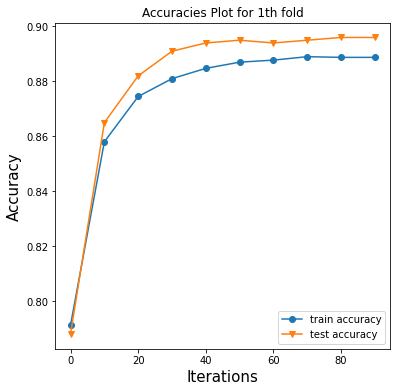

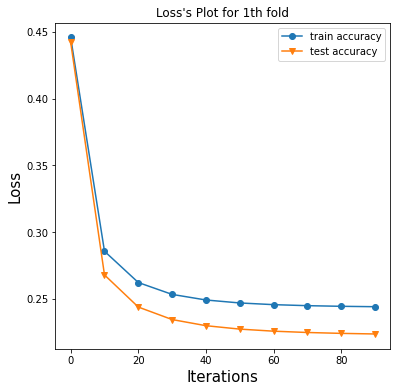

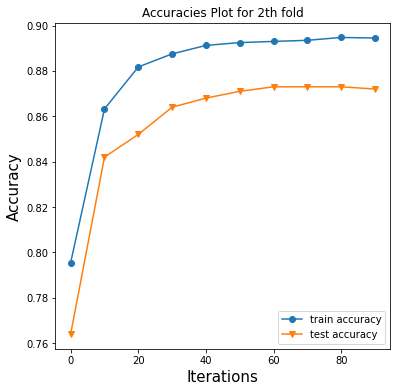

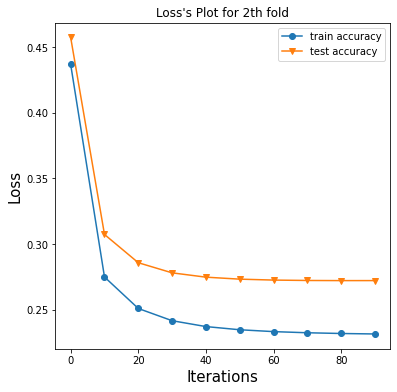

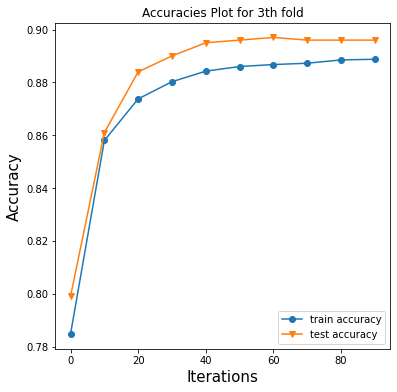

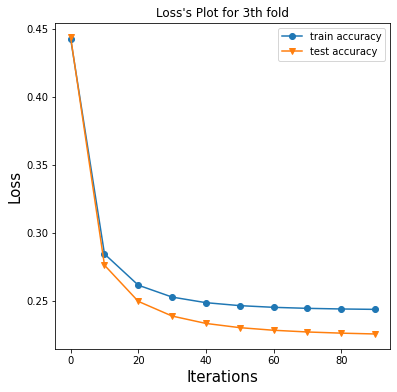

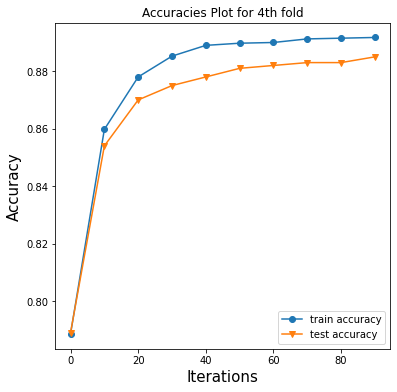

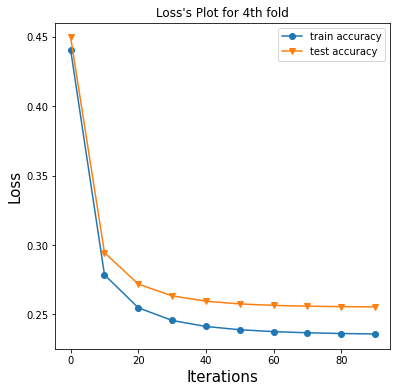

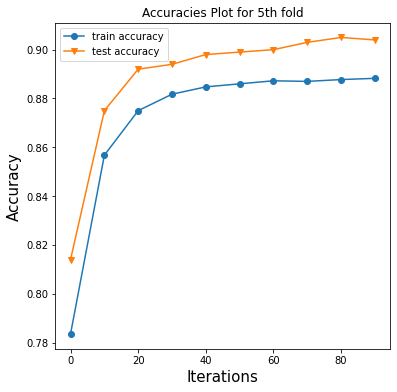

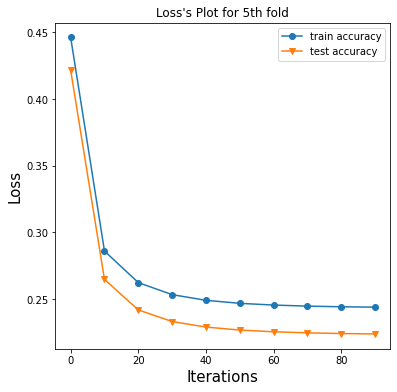

In [ ]:
train_acc,test_acc,train_loss,test_loss = clr.fit_on_folds_c(5)

In [ ]:
df = pd.DataFrame()
df['Training Accuracy'] = train_acc
df['Testing Accuracy'] = test_acc
df['Training Loss'] = train_loss
df['Testing Loss'] = test_loss
df

,Training Accuracy,Testing Accuracy,Training Loss,Testing Loss
0,0.88875,0.896,0.244067,0.223647
1,0.89450,0.872,0.231546,0.272196
2,0.88875,0.896,0.243739,0.225668
3,0.89175,0.885,0.235881,0.255405
4,0.88825,0.904,0.243935,0.223851


# Question 2.d)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: overflow encountered in power


Best Lambda:0.0010


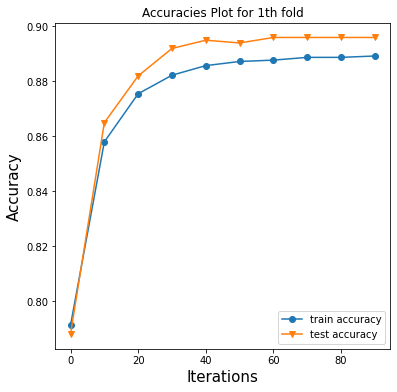

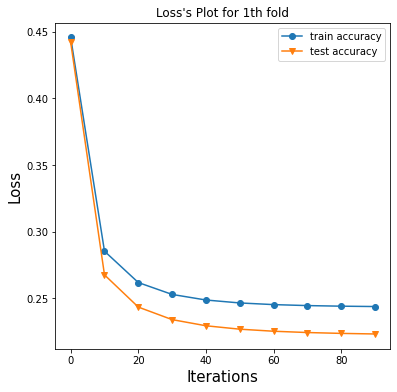

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: overflow encountered in power


Best Lambda:0.0010


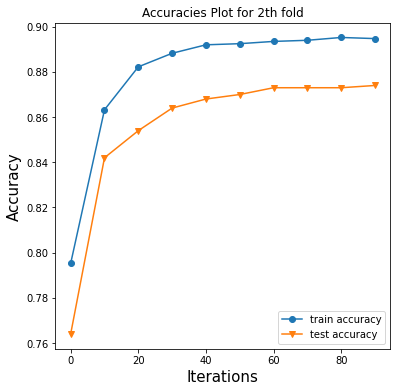

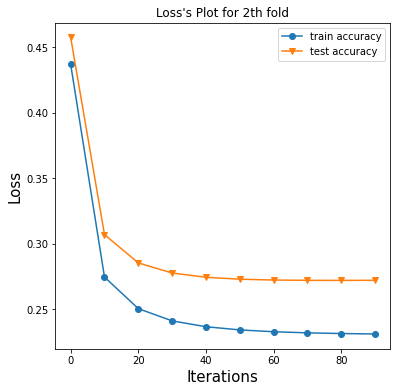

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: overflow encountered in power


Best Lambda:0.0100


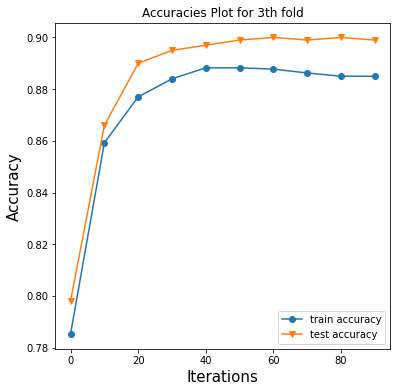

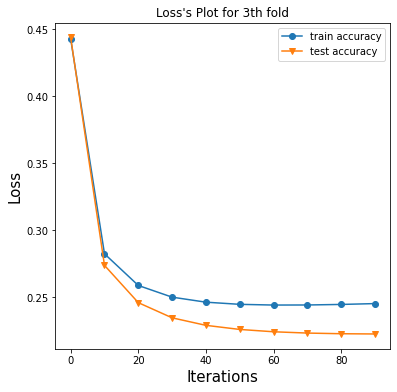

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: overflow encountered in power


Best Lambda:0.0010


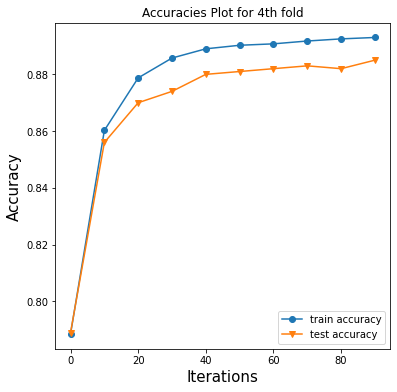

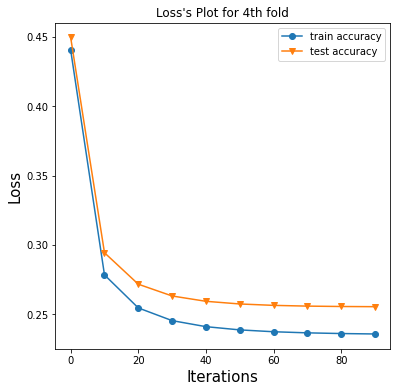

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: overflow encountered in power


Best Lambda:0.0001


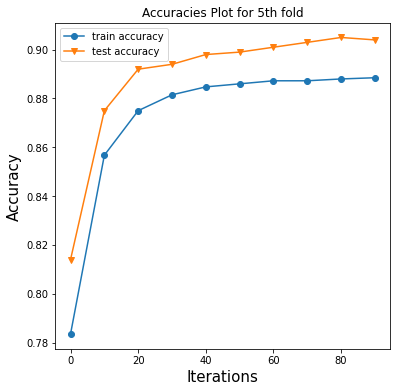

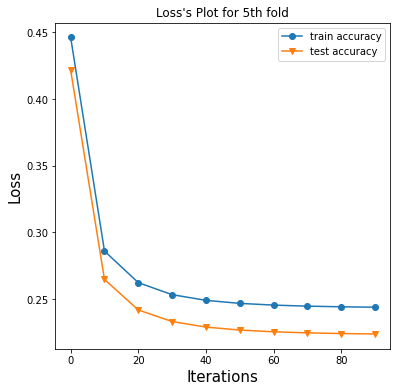

In [ ]:
train_acc,test_acc,train_loss,test_loss = clr.fit_on_folds_d(5)

In [ ]:
df = pd.DataFrame()
df['Training Accuracy'] = train_acc
df['Testing Accuracy'] = test_acc
df['Training Loss'] = train_loss
df['Testing Loss'] = test_loss
df

,Training Accuracy,Testing Accuracy,Training Loss,Testing Loss
0,0.88925,0.896,0.243883,0.223302
1,0.89475,0.874,0.231328,0.272253
2,0.88500,0.899,0.245436,0.222782
3,0.89300,0.885,0.235676,0.255368
4,0.88850,0.904,0.243913,0.223847


# Question 2.e)

In [ ]:
train_acc,test_acc,train_loss,test_loss = clr.fit_on_folds_e(5)

In [ ]:
df = pd.DataFrame()
df['Training Accuracy'] = train_acc
df['Testing Accuracy'] = test_acc
df['Training Loss'] = train_loss
df['Testing Loss'] = test_loss
df

,Training Accuracy,Testing Accuracy,Training Loss,Testing Loss
0,0.88875,0.894,0.243695,0.223073
1,0.89475,0.875,0.231024,0.272414
2,0.88925,0.895,0.243381,0.224786
3,0.89225,0.885,0.235420,0.255206
4,0.88850,0.904,0.243539,0.223439


# Question 3

In [ ]:
data = loadmat('/content/drive/My Drive/ML_Assignment2/dataset_2.mat')

In [ ]:
df = pd.DataFrame(data['samples'],columns=['x','y'],index=None)
df['label'] = data['labels'][0]

In [ ]:
samples = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values

In [ ]:
clr = LogRegression(samples,labels)

# Question 3.a)

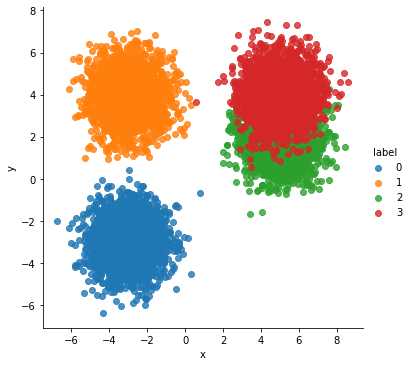

In [ ]:
sn.lmplot(data=df, x='x', y='y', hue='label',
                   fit_reg=False, legend=True, legend_out=True)

# Question 3.b)

In [ ]:
train_acc_b, test_acc_b = clr.ovo(df,5)

Fold 1
Testing  Accuracy for class0 is: 1.00
Testing  Accuracy for class1 is: 1.00
Testing  Accuracy for class2 is: 0.84
Testing  Accuracy for class3 is: 0.85

Training Accuracy for class0 is: 1.00
Training Accuracy for class1 is: 1.00
Training Accuracy for class2 is: 0.85
Training Accuracy for class3 is: 0.84


Fold 2
Testing  Accuracy for class0 is: 1.00
Testing  Accuracy for class1 is: 1.00
Testing  Accuracy for class2 is: 0.91
Testing  Accuracy for class3 is: 0.73

Training Accuracy for class0 is: 1.00
Training Accuracy for class1 is: 1.00
Training Accuracy for class2 is: 0.91
Training Accuracy for class3 is: 0.74


Fold 3
Testing  Accuracy for class0 is: 1.00
Testing  Accuracy for class1 is: 1.00
Testing  Accuracy for class2 is: 0.72
Testing  Accuracy for class3 is: 0.93

Training Accuracy for class0 is: 1.00
Training Accuracy for class1 is: 1.00
Training Accuracy for class2 is: 0.70
Training Accuracy for class3 is: 0.94


Fold 4
Testing  Accuracy for class0 is: 1.00
Testing  Accu

In [ ]:
df = pd.DataFrame()
df['Training Accuracy'] = train_acc_b
df['Testing Accuracy'] = test_acc_b
df

,Training Accuracy,Testing Accuracy
0,0.921750,0.9250
1,0.912375,0.9105
2,0.909625,0.9180
3,0.906250,0.9105
4,0.882500,0.8860


# Question 3.c)

In [ ]:
train_acc_c, test_acc_c = clr.ovr(samples,labels,5)

Fold 1
Testing Accuracy for class0 is: 1.00
Testing Accuracy for class1 is: 0.99
Testing Accuracy for class2 is: 0.87
Testing Accuracy for class3 is: 0.86

Training Accuracy for class0 is: 1.00
Training Accuracy for class1 is: 0.99
Training Accuracy for class2 is: 0.87
Training Accuracy for class3 is: 0.85


Fold 2
Testing Accuracy for class0 is: 1.00
Testing Accuracy for class1 is: 0.99
Testing Accuracy for class2 is: 0.86
Testing Accuracy for class3 is: 0.86

Training Accuracy for class0 is: 1.00
Training Accuracy for class1 is: 0.99
Training Accuracy for class2 is: 0.87
Training Accuracy for class3 is: 0.85


Fold 3
Testing Accuracy for class0 is: 1.00
Testing Accuracy for class1 is: 0.99
Testing Accuracy for class2 is: 0.87
Testing Accuracy for class3 is: 0.87

Training Accuracy for class0 is: 1.00
Training Accuracy for class1 is: 0.99
Training Accuracy for class2 is: 0.87
Training Accuracy for class3 is: 0.85


Fold 4
Testing Accuracy for class0 is: 1.00
Testing Accuracy for class

In [ ]:
df = pd.DataFrame()
df['Training Accuracy'] = train_acc_c
df['Testing Accuracy'] = test_acc_c
df

,Training Accuracy,Testing Accuracy
0,0.928594,0.932875
1,0.929375,0.929750
2,0.928625,0.932750
3,0.929531,0.929125
4,0.931125,0.922750


# Question 3.d)

In [ ]:
train_acc_ovr, test_acc_ovr, train_acc_ovo, test_acc_ovo = clr.fit_on_folds_3d(5)

In [ ]:
df = pd.DataFrame()
df['Training Accuracy OVR'] = train_acc_ovr
df['Testing Accuracy OVR'] = test_acc_ovr
df['Training Accuracy OVO'] = train_acc_ovo
df['Testing Accuracy OVO'] = test_acc_ovo
df

,Training Accuracy OVR,Testing Accuracy OVR,Training Accuracy OVO,Testing Accuracy OVO
0,0.923125,0.9245,0.92375,0.9270
1,0.924500,0.9200,0.92575,0.9215
2,0.920375,0.9305,0.92225,0.9330
3,0.925000,0.9175,0.92600,0.9200
4,0.924125,0.9245,0.92625,0.9255
